<a href="https://colab.research.google.com/github/Debabrat1/Machine_Learning_Codes/blob/main/ML_Lab_Assignment_10(Debabrat_Sarma_2002007_M_Tech_ECE).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Q1.Classify the X Ray image which is having Corona
Resources:
Dataset: CoronaHack -Chest X-Ray-Dataset from Kaggle.
Read the meta data and dataset information carefully.

Implement any deep neural network architecture (preferably DCNN)
to identify the X Ray image which is having Corona.
For details please visit the link (mentioned above) and try to
implement your code. 

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
import pandas as pd
sns.set()
import numpy as np # linear algebra
 # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import  Input, Conv2D, MaxPooling2D,GlobalMaxPooling2D, Flatten, Dense, GlobalAveragePooling2D, Activation, MaxPool2D, AvgPool2D, Dropout, Conv1D, MaxPooling1D
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.applications import DenseNet121, VGG19, ResNet50
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
from IPython.display import display, Image
import matplotlib.pyplot as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import warnings
warnings.filterwarnings("ignore")

from sklearn.utils import shuffle

In [ ]:
train_df = pd.read_csv('Chest_xray_Corona_Metadata.csv')

In [ ]:
train_df.head(5)

,Unnamed: 0,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category
0,0,IM-0128-0001.jpeg,Normal,TRAIN,NaN,NaN
1,1,IM-0127-0001.jpeg,Normal,TRAIN,NaN,NaN
2,2,IM-0125-0001.jpeg,Normal,TRAIN,NaN,NaN
3,3,IM-0122-0001.jpeg,Normal,TRAIN,NaN,NaN
4,4,IM-0119-0001.jpeg,Normal,TRAIN,NaN,NaN


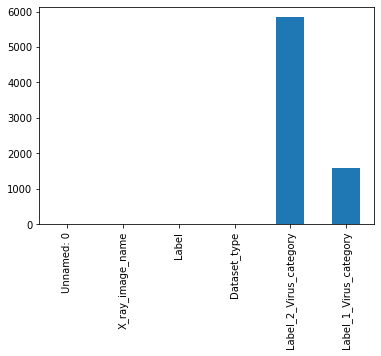

In [ ]:
missing_vals = train_df.isnull().sum()
missing_vals.plot(kind = 'bar')

In [ ]:
train_df.dropna(how = 'all')
train_df.isnull().sum()

Unnamed: 0                   0
X_ray_image_name             0
Label                        0
Dataset_type                 0
Label_2_Virus_category    5841
Label_1_Virus_category    1576
dtype: int64

In [ ]:
train_data = train_df[train_df['Dataset_type'] == 'TRAIN']
test_data = train_df[train_df['Dataset_type'] == 'TEST']
assert train_data.shape[0] + test_data.shape[0] == train_df.shape[0]
print(f"Shape of train data : {train_data.shape}")
print(f"Shape of test data : {test_data.shape}")
test_data.sample(10)

Shape of train data : (5286, 6)
Shape of test data : (624, 6)


,Unnamed: 0,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category
5469,5492,NORMAL2-IM-0123-0001.jpeg,Normal,TEST,NaN,NaN
5591,5614,person140_bacteria_667.jpeg,Pnemonia,TEST,NaN,bacteria
5823,5846,person38_virus_83.jpeg,Pnemonia,TEST,NaN,Virus
5633,5656,person126_bacteria_600.jpeg,Pnemonia,TEST,NaN,bacteria
5841,5864,person21_virus_53.jpeg,Pnemonia,TEST,NaN,Virus
5723,5746,person94_bacteria_456.jpeg,Pnemonia,TEST,NaN,bacteria
5698,5721,person104_bacteria_491.jpeg,Pnemonia,TEST,NaN,bacteria
5839,5862,person22_virus_55.jpeg,Pnemonia,TEST,NaN,Virus
5494,5517,NORMAL2-IM-0370-0001.jpeg,Normal,TEST,NaN,NaN
5876,5899,person1670_virus_2886.jpeg,Pnemonia,TEST,NaN,Virus


In [ ]:
train_fill = train_data.fillna('unknown')
test_fill = test_data.fillna('unknown')
display(train_fill.head(5))

,Unnamed: 0,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category
0,0,IM-0128-0001.jpeg,Normal,TRAIN,unknown,unknown
1,1,IM-0127-0001.jpeg,Normal,TRAIN,unknown,unknown
2,2,IM-0125-0001.jpeg,Normal,TRAIN,unknown,unknown
3,3,IM-0122-0001.jpeg,Normal,TRAIN,unknown,unknown
4,4,IM-0119-0001.jpeg,Normal,TRAIN,unknown,unknown


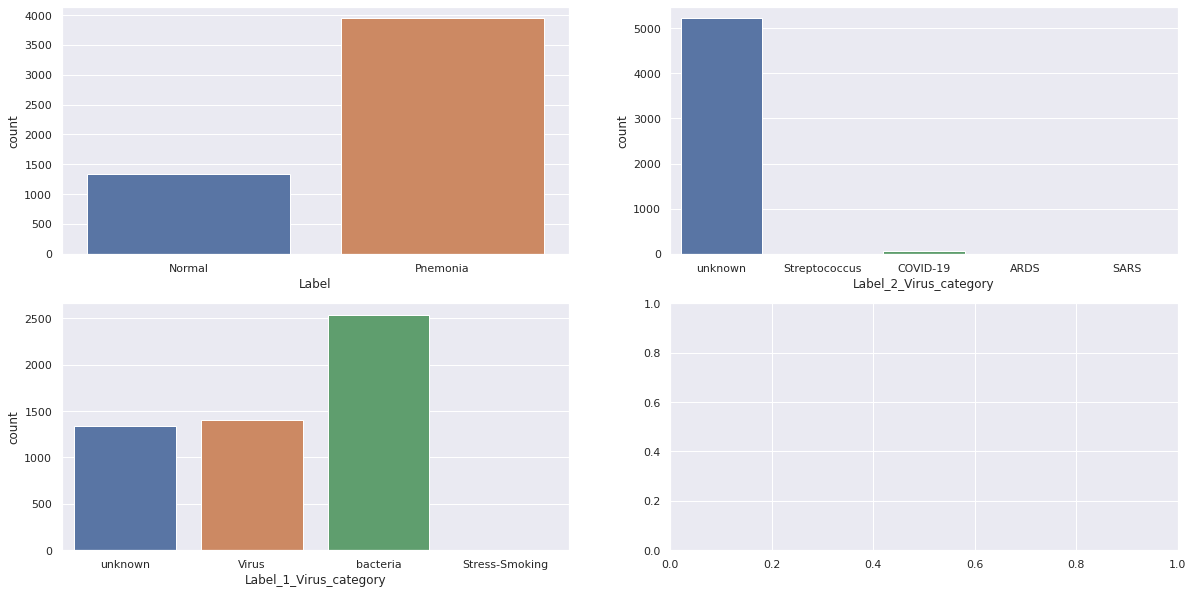

In [ ]:
# Count plot for 3 attributes with unknown variable addition
targets = ['Label', 'Label_2_Virus_category', 'Label_1_Virus_category']
fig, ax = plt.subplots(2,2, figsize=(20, 10))
sns.countplot(x=targets[0], data=train_fill, ax=ax[0, 0])
sns.countplot(x=targets[1], data=train_fill, ax=ax[0, 1])
sns.countplot(x=targets[2], data=train_fill, ax=ax[1, 0])
plt.show()


In [ ]:
final_train_data = train_data[(train_data['Label'] == 'Normal') | 
                              ((train_data['Label'] == 'Pnemonia') & (train_data['Label_2_Virus_category'] == 'COVID-19'))]


# Create a target attribute where value = positive if 'Pnemonia + COVID-19' or value = negative if 'Normal'
final_train_data['target'] = ['negative' if holder == 'Normal' else 'positive' for holder in final_train_data['Label']]

final_train_data = shuffle(final_train_data, random_state=1)

final_validation_data = final_train_data.iloc[1000:, :]
final_train_data = final_train_data.iloc[:1000, :]

print(f"Final train data shape : {final_train_data.shape}")
final_train_data.sample(10)

Final train data shape : (1000, 7)


,Unnamed: 0,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category,target
41,41,IM-0237-0001.jpeg,Normal,TRAIN,NaN,NaN,negative
32,32,IM-0141-0001.jpeg,Normal,TRAIN,NaN,NaN,negative
1315,1315,NORMAL2-IM-1365-0001.jpeg,Normal,TRAIN,NaN,NaN,negative
733,733,NORMAL2-IM-0547-0001.jpeg,Normal,TRAIN,NaN,NaN,negative
388,388,IM-0570-0001.jpeg,Normal,TRAIN,NaN,NaN,negative
585,585,NORMAL2-IM-0402-0001.jpeg,Normal,TRAIN,NaN,NaN,negative
559,559,IM-0727-0001.jpeg,Normal,TRAIN,NaN,NaN,negative
119,119,IM-0314-0001.jpeg,Normal,TRAIN,NaN,NaN,negative
852,852,NORMAL2-IM-0736-0001.jpeg,Normal,TRAIN,NaN,NaN,negative
773,773,NORMAL2-IM-0643-0001.jpeg,Normal,TRAIN,NaN,NaN,negative


In [ ]:
train_image_generator = ImageDataGenerator(
    rescale=1./255,
    validation_split = 0.2,
    shear_range=0.2,
    zoom_range=0.2,
)

train_generator = train_image_generator.flow_from_dataframe(
    dataframe=final_train_data,
    directory=train_img_dir,
    x_col='X_ray_image_name',
    y_col='target',
    target_size=(224, 224),
    batch_size=16,
    seed=2020,
    shuffle=True,
    class_mode='binary'
)

validation_generator = train_image_generator.flow_from_dataframe(
    dataframe=final_validation_data,
    directory=train_img_dir,
    x_col='X_ray_image_name',
    y_col='target',
    target_size=(224, 224),
    batch_size=16,
    seed=2020,
    shuffle=True,
    class_mode='binary'
)

Found 0 validated image filenames belonging to 0 classes.
Found 0 validated image filenames belonging to 0 classes.


In [ ]:
#cnn
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape= (224,224,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(Conv2D(250,(3,3)))
model.add(Dropout(0.5))
model.add(Activation("relu"))
  
model.add(Conv2D(128,(3,3)))
model.add(Activation("relu"))
model.add(AvgPool2D(2,2))
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(AvgPool2D(2,2))

model.add(Conv2D(256,(2,2)))
model.add(Activation("relu"))
model.add(MaxPool2D(2,2))
    
model.add(Flatten())
model.add(Dense(32))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation("sigmoid"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 222, 222, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 32)      9248      
_________________________________________________________________
activation_1 (Activation)    (None, 109, 109, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 64)        1

In [ ]:
callbacks = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)

In [ ]:
BATCH_SIZE = 16
EPOCHS = 30